In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sqlite3
from sqlite3 import Error

rcParams.update({'figure.autolayout': True})

# Create a database connection
conn = None 
try:
    conn = sqlite3.connect('../spotify.db')
except Error as error:
    print(error)

/Users/yesenia/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


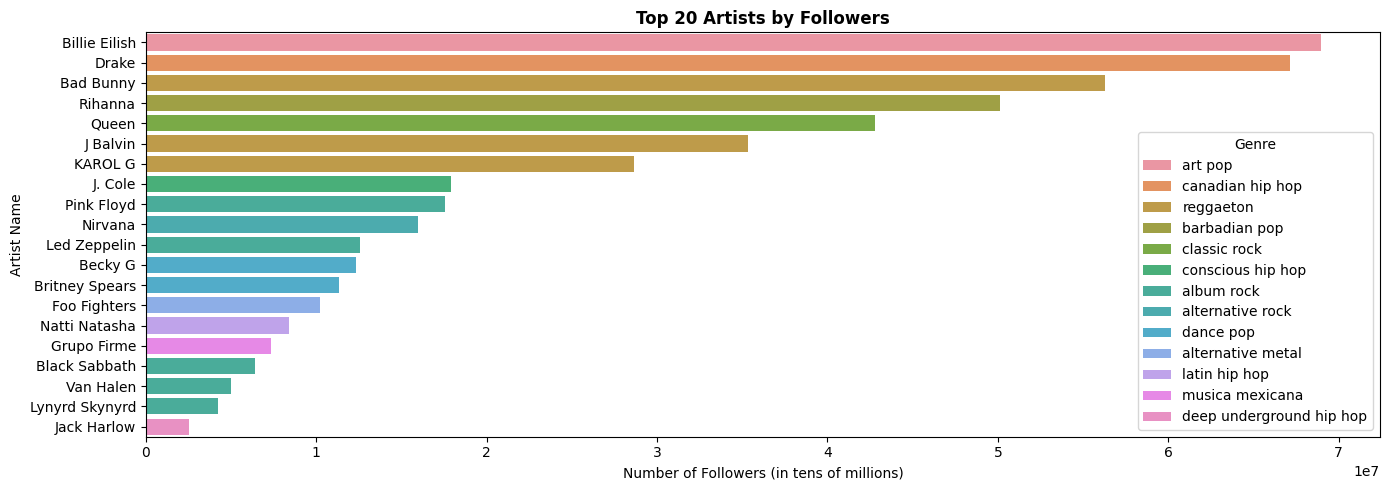

In [7]:
# The top 20 artists in the database based on the number of followers and color labeled by genre 

df = pd.read_sql_query("SELECT * FROM top_20_artists_by_followers", conn)
plt.figure(figsize=(14,5))
ax = sns.barplot(df, y='artist_name', x="followers", hue="genre", dodge=False)
ax.set_title("Top 20 Artists by Followers", fontsize='large', fontweight='bold')
ax.set_ylabel("Artist Name")
ax.set_xlabel("Number of Followers (in tens of millions)")
plt.legend(title="Genre")
plt.savefig("../visualization_imgs/top_20_artists_by_followers")
plt.show()

/Users/yesenia/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


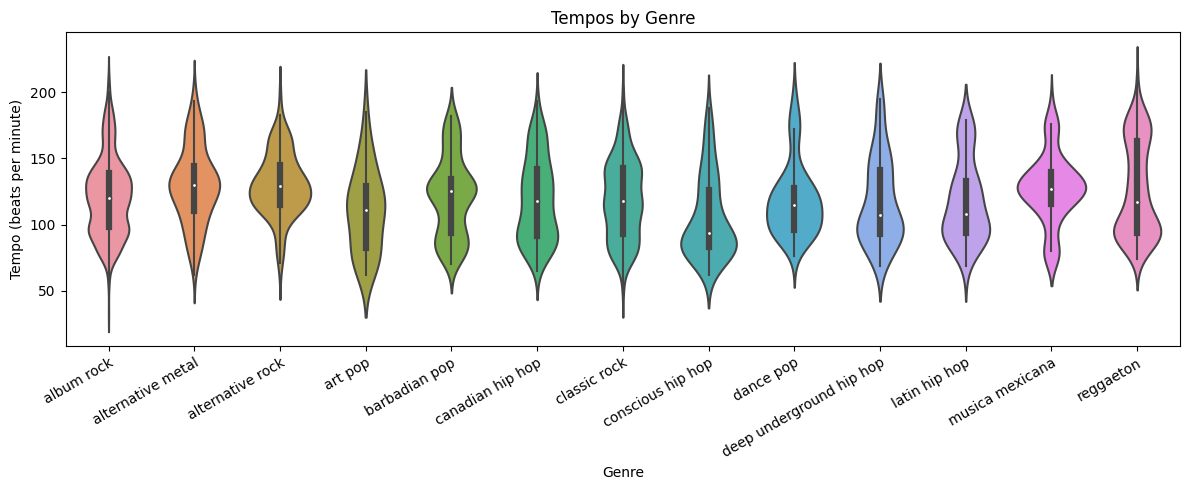

In [8]:
# The distribution of the varying tempos based on genre

df = pd.read_sql_query("SELECT * FROM tempos_by_genre;", conn)
plt.figure(figsize=(12,5))
g = sns.violinplot(x='genre', y='tempo', data=df)
g.set(xlabel='Genre', ylabel='Tempo (beats per minute)', title='Tempos by Genre')
plt.xticks(rotation = 30, rotation_mode='anchor', ha='right')
plt.savefig("../visualization_imgs/tempos_by_genre_violin")
plt.show()

/Users/yesenia/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


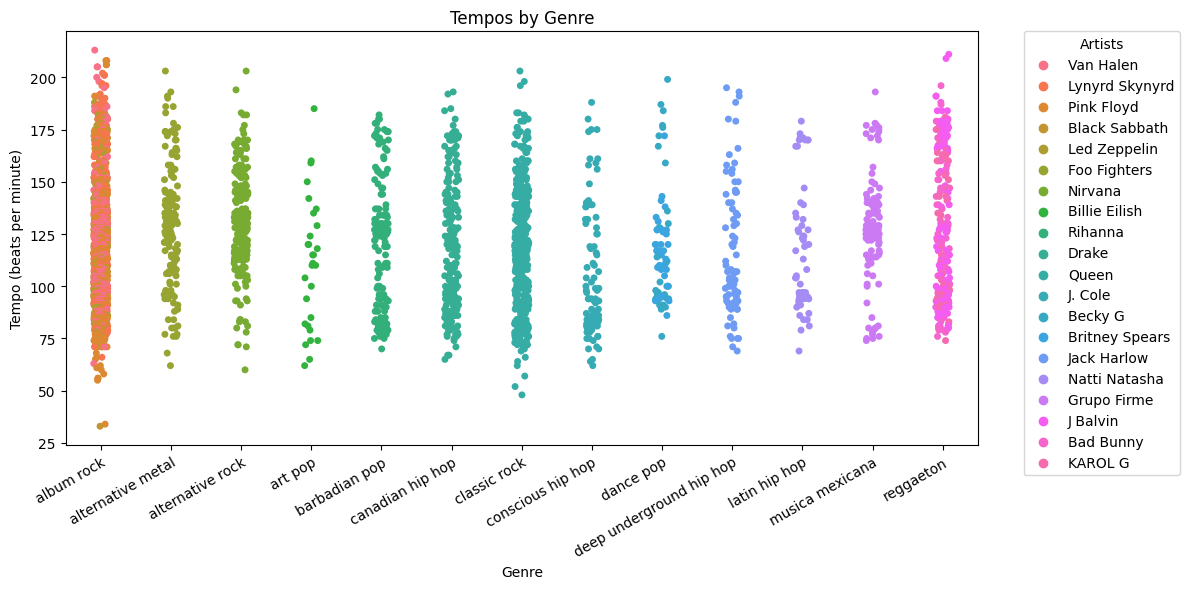

In [9]:
# The distribution of the varying tempos based on genre and color coded by Artist

df = pd.read_sql_query("SELECT * FROM tempos_by_genre;", conn)
plt.figure(figsize=(12,6))
g = sns.stripplot(x='genre', y='tempo', hue='artist_name', data=df)
g.set(xlabel='Genre', ylabel='Tempo (beats per minute)', title='Tempos by Genre')
plt.xticks(rotation = 30, rotation_mode='anchor', ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Artists")
plt.savefig("../visualization_imgs/tempos_by_genre_strip")
plt.show()

/Users/yesenia/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


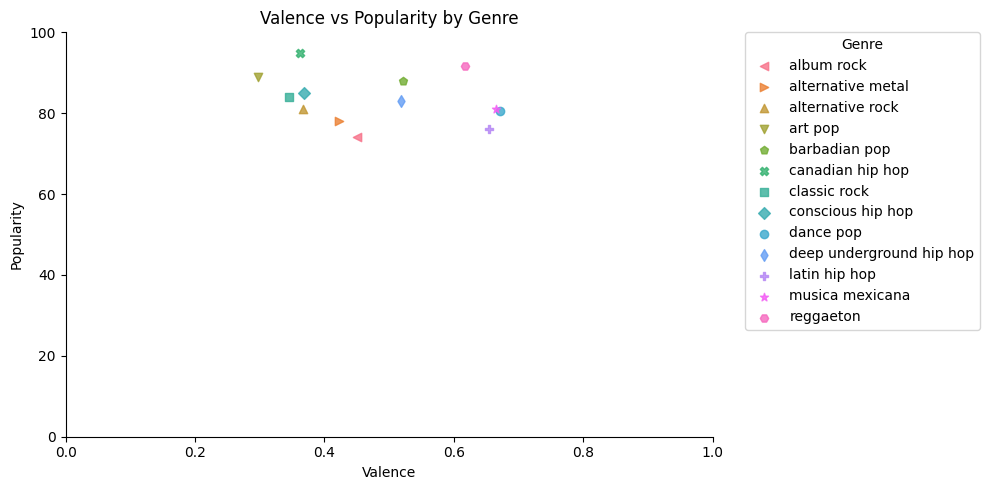

In [10]:
# Valence vs Popularity based on Genre

# A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks 
# with low valence sound more negative (e.g. sad, depressed, angry).

# The popularity of the artist. The value will be between 0 and 100, with 100 being 
# the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.

df = pd.read_sql_query("SELECT * FROM valence_popularity_by_genre", conn)

type_dic = {
    "popularity": "float64",
    "valence": "float64"
}
df = df.astype(type_dic)
markers = ["<", ">", "^", "v", "p", "X", "s", "D", "o", "d", "P","*","H"]
g = sns.lmplot(x='valence', y='popularity', data=df, hue="genre", legend=False, aspect=2, markers=markers)
g.set(xlabel='Valence', ylabel='Popularity', title='Valence vs Popularity by Genre', xlim=(0,1), ylim=(0,100))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Genre")
plt.savefig("../visualization_imgs/valence_popularity_by_genre")
plt.show()

/Users/yesenia/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


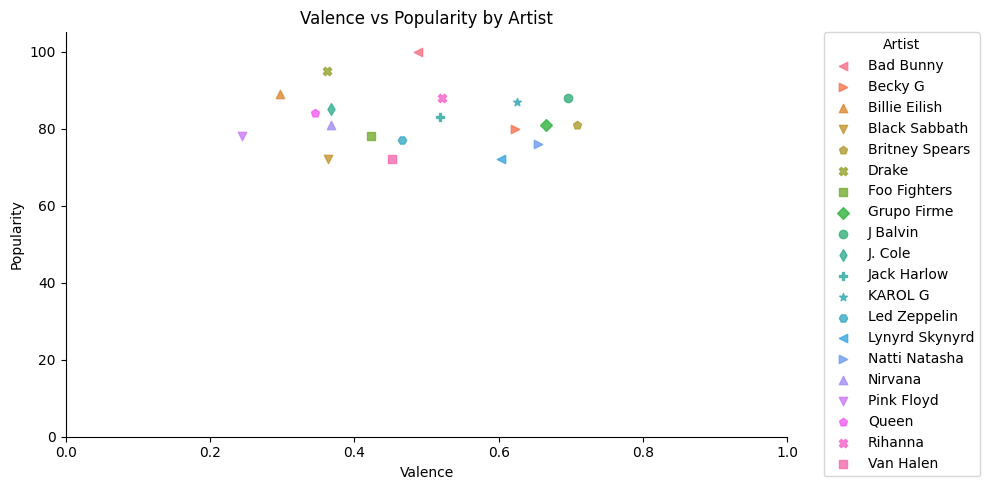

In [11]:
# Valence vs Popularity based on Artist

# A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks 
# with low valence sound more negative (e.g. sad, depressed, angry).

# The popularity of the artist. The value will be between 0 and 100, with 100 being 
# the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.

df = pd.read_sql_query("SELECT * FROM valence_popularity_by_artist", conn)

type_dic = {
    "popularity": "float64",
    "valence": "float64"
}
df = df.astype(type_dic)
markers = ["<", ">", "^", "v", "p", "X", "s", "D", "o", "d", "P","*","H", "<", ">", "^", "v", "p", "X", "s"]
g = sns.lmplot(x='valence', y='popularity', data=df, hue="artist", legend=False, aspect=2, markers=markers)
g.set(xlabel='Valence', ylabel='Popularity', title='Valence vs Popularity by Artist', xlim=(0,1), ylim=(0,105))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Artist")
plt.savefig("../visualization_imgs/valence_popularity_by_artist")
plt.show()

/Users/yesenia/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


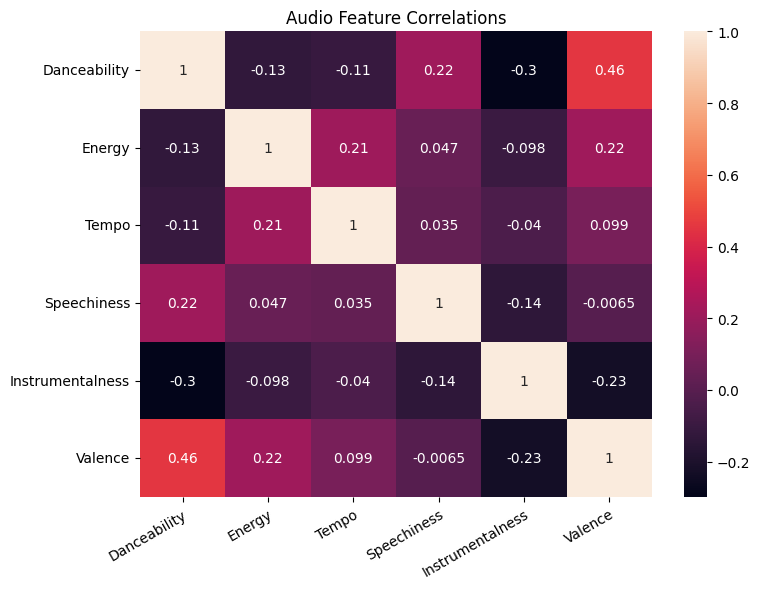

In [12]:
# Correlations between track audio features

ds = pd.read_sql_query("SELECT * FROM audio_features_correlations", conn)
ds = ds.astype("float64")
plt.figure(figsize=(8,6))
pc = ds.corr(method ='pearson')
ax = sns.heatmap(pc, annot=True, annot_kws={'size': 10})
ax.set(title="Audio Feature Correlations")
plt.xticks(rotation = 30, rotation_mode='anchor', ha='right')
plt.savefig("../visualization_imgs/audio_feature_correlations")
plt.show()

/Users/yesenia/.pyenv/versions/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


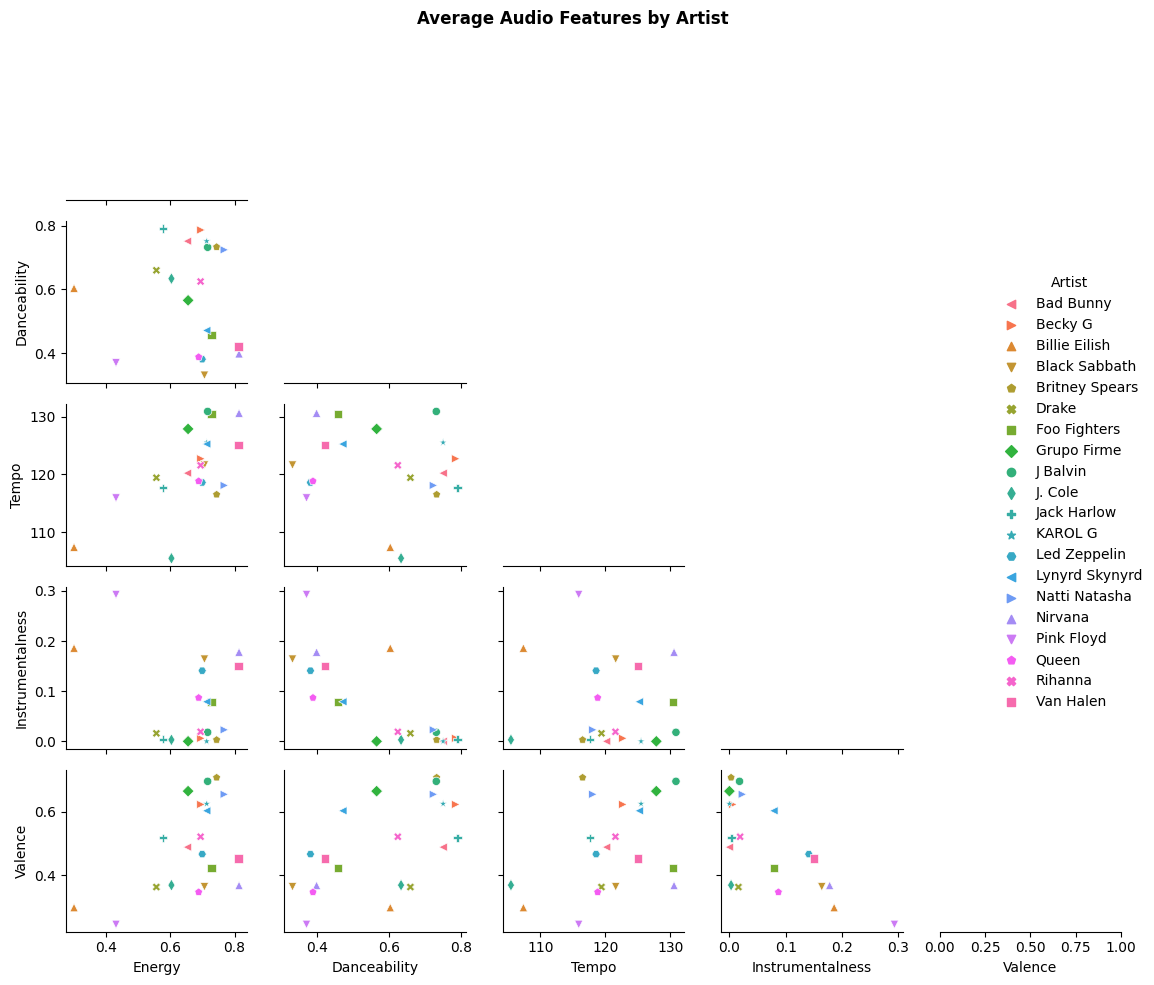

In [13]:
# Relationship between track audio features and color coordinated by artist

ds = pd.read_sql_query("SELECT * FROM avg_audio_features_by_artist", conn)
type_dic = {
    "Energy": "float64",
    "Danceability": "float64",
    "Tempo": "float64",
    "Instrumentalness": "float64",
    "Valence": "float64"
}
ds = ds.astype(type_dic)
markers = ["<", ">", "^", "v", "p", "X", "s", "D", "o", "d", "P","*","H", "<", ">", "^", "v", "p", "X", "s"]
sns.pairplot(ds, x_vars=["Energy", "Danceability", "Tempo", "Instrumentalness", "Valence"], y_vars=["Energy", "Danceability", "Tempo", "Instrumentalness", "Valence"], hue="Artist", corner=True, markers=markers, height=2)
plt.suptitle("Average Audio Features by Artist", fontsize='large', fontweight='bold')
plt.savefig("../visualization_imgs/avg_audio_features_by_artist") 
plt.show()